# Relatório Final - ATP de Preparação e Análise Exploratória de Dados
# Curso de Tecnologia em Big Data e Inteligência Analítica
# Pontifícia Universidade Católica do Paraná (PUCPR)

Aluno: Douglas Branco Pessanha Lopes - email- douglaspessanha@protonmail.com


## 1. Introdução
Nesta atividade prática desenvolveremos a análise dos dados da empresa Enron. Esta foi uma grande empresa de energia nos EUA que foi a falência após serem descobertas fraudes em seus relatórios financeiros e contábeis. Foi elaborado um refinado sistema envolvendo diversas área da empresa para ocultar prejuízos e investimentos equivocados. Após a descoberta da fraude houve uma profunda investigação governamental para averiguar o ocorrido.
A base de dados apresenta uma série de informações sobre a companhia e os funcionários dela. Os funcionários serão divididos entre People of Interest (POI), aqueles que participaram da fraude, e os demais. Procuraremos insights sobre o perfil do tipo de funcionário que participou da fraude.

importa bibliotecas a serem utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

carrega o csv do computador

In [2]:
df = pd.read_csv("/home/douglas/PUC_disciplinas/preparação_analise_exploratoria_dados/enron.csv")

## 2. Analise Descritiva de Dados

mostra as 5 primeira linhas, 
o nome de todas as colunas
e o número de linha e colunas, 
A tabela possui 146 instâncias e 22 atributos

In [3]:
display(df.head());display(df.columns); display(df.shape)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0,BADUM JAMES P
2,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0,BAY FRANKLIN R


Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'poi', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value', 'name'],
      dtype='object')

(146, 22)

São contados o número de funcionários que participaram da fraude, 18, e os que não participaram, 128. Podemos observar que a maior parte dos funcionários não participou da fraude.

In [4]:
df["poi"].value_counts()

False    128
True      18
Name: poi, dtype: int64

Mostra o tipo de variável por coluna

In [5]:
df.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
name                          object
dtype: object

Seleciona as colunas que apresentam tipos numéricos

In [6]:
df_numero = df.select_dtypes(include="number")

Aplica os métodos no para obter média, mediana, variância, desvio padrão e valores dos quartis em todos os atributos numéricos

In [7]:
df_numero.agg([np.mean, np.median, np.var, np.std])

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,6.087907e+02,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1.176465e+03,2.073860e+03,5.081526e+06,6.773957e+06
median,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,4.100000e+01,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,7.405000e+02,1.211000e+03,1.101393e+06,1.102872e+06
var,1.147754e+14,2.664552e+13,1.620390e+13,1.023305e+11,9.648483e+14,2.846594e+11,3.389406e+06,7565.388919,10014.627633,2.216829e+15,3.531639e+13,2.106124e+13,1.567073e+14,1.765255e+13,7.378661e+12,1.388432e+06,6.670344e+06,8.445834e+14,1.517708e+15
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1.841034e+03,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1.178318e+03,2.582701e+03,2.906172e+07,3.895777e+07


Apresenta uma série de informações estatíticas sobre os dados estudados.
Podemos observar que pagamentos de bonus, incentivos de longo prazo e adiantamento de pagamentos eram praticas relativamento comuns entre os funcionários. 82 dos 146 funcionários estudados recebiam bonus, 66 incentivos de longo prazo e 49 adiantamentos. Entretando, os valores no ultimo quartil são muito superiores, revelando que poucos funcionários recebiam valores mais altos, algo bastante comum em empresa hierarquizadas.

In [8]:
df_numero.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [9]:
df_nao_numero = df.select_dtypes(include="object")

In [10]:
df_nao_numero.head

<bound method NDFrame.head of                   email_address                   name
0       phillip.allen@enron.com        ALLEN PHILLIP K
1                           NaN          BADUM JAMES P
2    james.bannantine@enron.com     BANNANTINE JAMES M
3                           NaN          BAXTER JOHN C
4           frank.bay@enron.com         BAY FRANKLIN R
..                          ...                    ...
141                         NaN  WINOKUR JR. HERBERT S
142     john.wodraska@enron.com          WODRASKA JOHN
143                         NaN           WROBEL BRUCE
144      scott.yeager@enron.com         YEAGER F SCOTT
145                         NaN              YEAP SOON

[146 rows x 2 columns]>

elimina os duplicados e apresenta os valores únicos de cada variável

In [11]:
df_nao_numero.drop_duplicates(subset=["name"])

,email_address,name
0,phillip.allen@enron.com,ALLEN PHILLIP K
1,NaN,BADUM JAMES P
2,james.bannantine@enron.com,BANNANTINE JAMES M
3,NaN,BAXTER JOHN C
4,frank.bay@enron.com,BAY FRANKLIN R
...,...,...
141,NaN,WINOKUR JR. HERBERT S
142,john.wodraska@enron.com,WODRASKA JOHN
143,NaN,WROBEL BRUCE
144,scott.yeager@enron.com,YEAGER F SCOTT


## 3. Análise Univariada dos Dados

Mostra os bonus recebidos. Tiramos os outliers. Observa-se que há uma concentração de bonus recebidos nos valores mais baixos. Distribuição possui uma assimetria positiva.

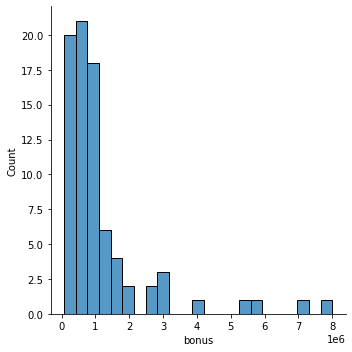

In [12]:
sns.displot(df[df["bonus"]<=0.8*1e8]["bonus"])


Trata-se de uma espécie de adiantamento. Tiramos os outliers. Observa-se que há uma concentração nos valores mais baixos. Distribuição possui uma assimetria positiva.

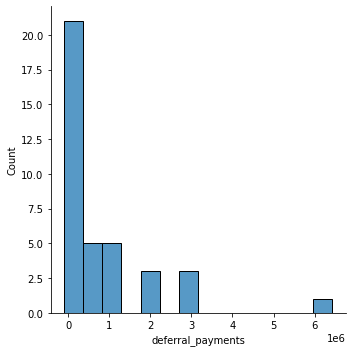

In [13]:
sns.displot(df[df["deferral_payments"]<=1*1e7]["deferral_payments"])

Trata-se de uma espécie de adiantamento. Tiramos os outliers. Observa-se que há uma concentração nos valores próximos de 0. Distribuição possui uma assimetria negativa.

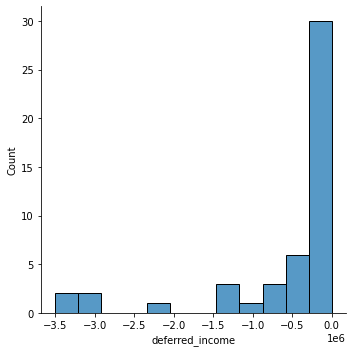

In [14]:
sns.displot(df[df["deferred_income"]>=-0.5*1e7]["deferred_income"])

Trata-se de um pagamento para diretores. Tiramos os outliers. Observa-se que há dois clusters, um entre 0 e 50.000, aproximadamente, e outro entre 90.000 e 135.00, aproximadamente. O maior número encontra-se entre 90.000 e 110.000

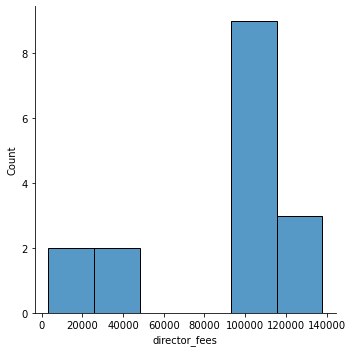

In [15]:
sns.displot(df[df["director_fees"]<= 1.0*1e6]["director_fees"])

Compra de ações em um preço pré-definido. Observa-se a concentração em valores mais baixos. Foram tirados os outliers. Distribuição possui uma assimetria positiva.

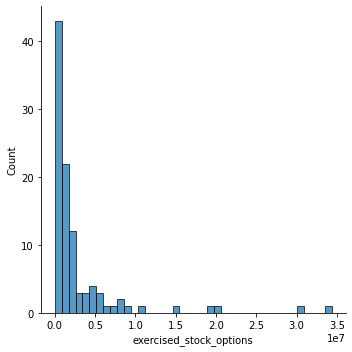

In [16]:
sns.displot(df[df["exercised_stock_options"]<=0.5*1e8]["exercised_stock_options"])

Despesas efetuadas pelos empregados. Concentração de valores entre 0 75.000. Depois uma queda acentuadas nas despesas. Também foram eliminados os outliers.Distribuição possui uma assimetria positiva.

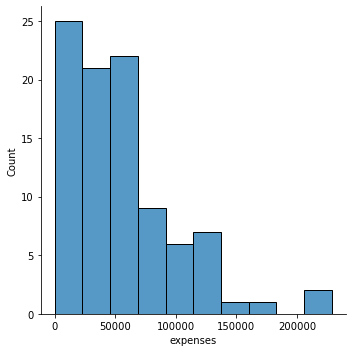

In [17]:
sns.displot(df[df["expenses"]<=1*1e6]["expenses"])

Mensagens enviadas. A maior parte dos funcionários enviava número bem baixo de mensagens.

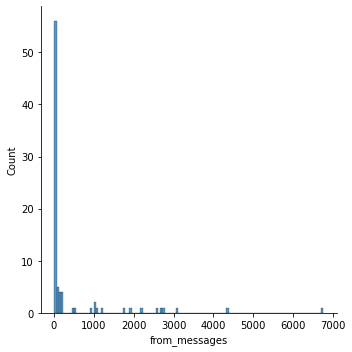

In [18]:
sns.displot(df[df["from_messages"]<=8000]["from_messages"])

Grande numero de mensagens recebidas de "POI" com valores um pouco superiores a zero. Distribuição possui uma assimetria positiva.

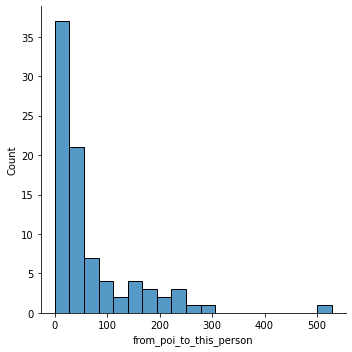

In [19]:
sns.displot(df["from_poi_to_this_person"])

Grande numero de mensagens enviadas a "POI" com valores um pouco superiores a zero.

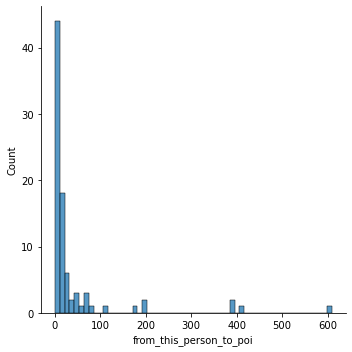

In [20]:
sns.displot(df["from_this_person_to_poi"])

Somente 4 pessoas fizeram adiantamentos de empréstismo. O gráfico acaba por não dizer muita coisa. 

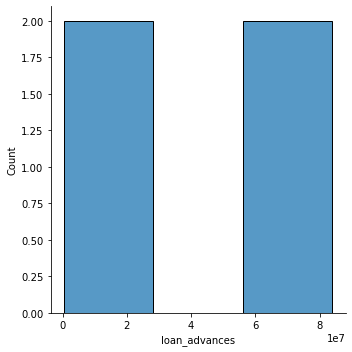

In [21]:
sns.displot(df["loan_advances"])

Incentivos de longo tempo concentrados em valores mais baixos. Foram retirados os outliers. Distribuição possui uma assimetria positiva.

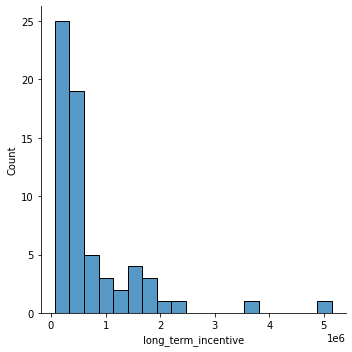

In [22]:
sns.displot(df[df["long_term_incentive"]<1*1e7]["long_term_incentive"])

other

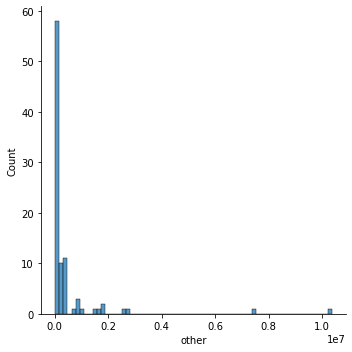

In [23]:
sns.displot(df[df["other"]<2*1e7]["other"])

Ações restritas variando positiva e negativamente próximo de 0. Foram eliminados os outliers

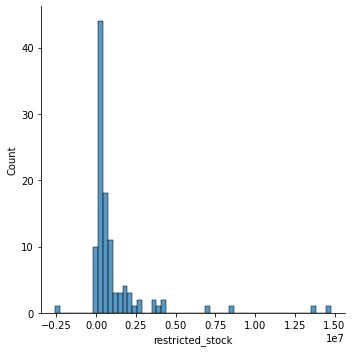

In [24]:
sns.displot(df[df["restricted_stock"]<1.2*1e8]["restricted_stock"])

Utilizado por poucas pessoas. Concentração próximo de 0.

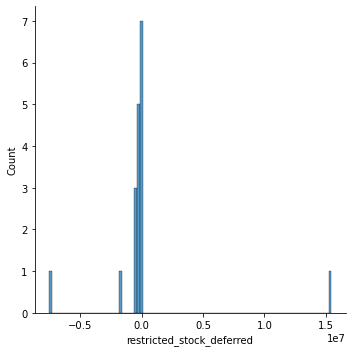

In [25]:
sns.displot(df["restricted_stock_deferred"])

Salários concentram-se entre valores mais baixos. Foram removidos os outliers

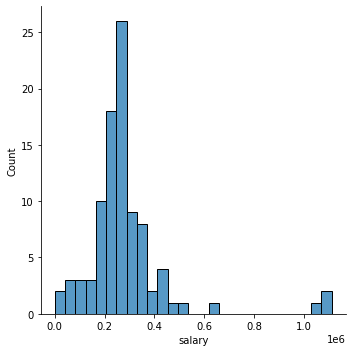

In [26]:
sns.displot(df[df["salary"]<2.5*1e7]["salary"])

Os recibos divididos com pessoas interessadas foi maior entre valores mais baixos, próximos de 0. Diminuem consideravelmente a medida que os valores aumentam.Distribuição possui uma assimetria positiva.

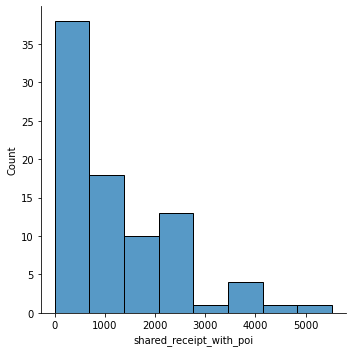

In [27]:
sns.displot(df["shared_receipt_with_poi"])

<AxesSubplot:xlabel='to_messages', ylabel='Count'>

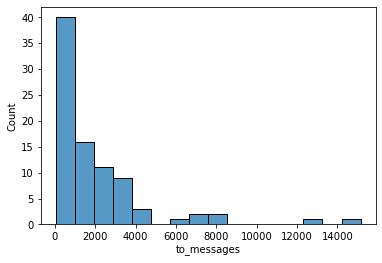

In [28]:
sns.histplot(df["to_messages"])

Total de pagamentos maiores entre valores menores. Foram excluídos os outliers.Distribuição possui uma assimetria positiva.

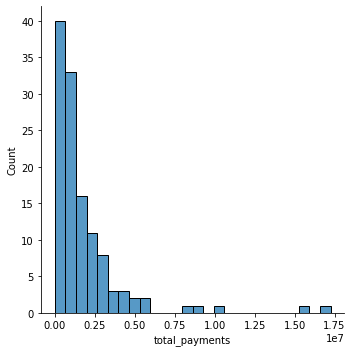

In [29]:
sns.displot(df[df["total_payments"]< 0.5*1e8]["total_payments"])

## 4. Analise Multivariada de Dados
Procuraremos encontrar a relação entre algumas informações apresentadas no dataset e "POI's". O objetivo é buscar encontrar quais características nos ajudam a determinar a probabilidade de alguem ser ou não um "POI"

Aparentemente não há correlação entre POI e Bonus

<AxesSubplot:xlabel='bonus', ylabel='Count'>

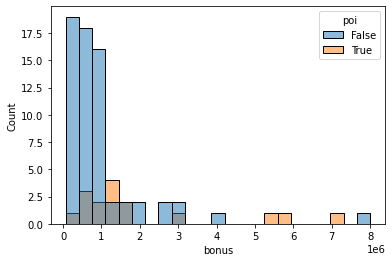

In [30]:
sns.histplot(data = df[df["bonus"] <= 0.5*1e8], x = "bonus" , hue = "poi")

Aparentemente não há correlação entre POI e adiantemento de pagamentos. 

<AxesSubplot:xlabel='deferral_payments', ylabel='Count'>

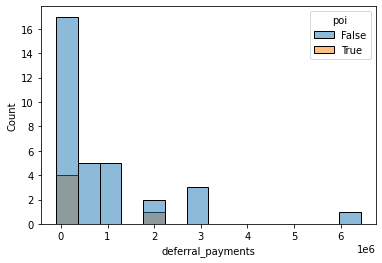

In [31]:
sns.histplot(data = df[df["deferral_payments"]<=1*1e7], x = "deferral_payments", hue = "poi")

Aparentamente há uma correlação entre adiantamento de pagamentos e POI.

<AxesSubplot:xlabel='deferred_income', ylabel='Count'>

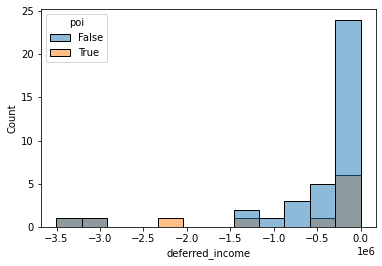

In [32]:
sns.histplot(data = df[df["deferred_income"]>=-0.5*1e7], x = "deferred_income", hue = "poi")

Nenhum POI recebeu honorário de diretor.

<AxesSubplot:xlabel='director_fees', ylabel='Count'>

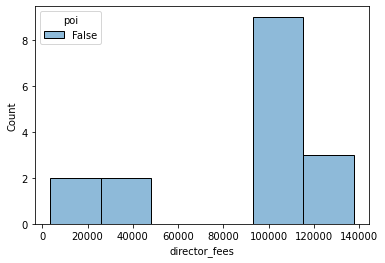

In [33]:
sns.histplot(data = df[df["director_fees"]<= 1.0*1e6], x = "director_fees", hue = "poi")

Há uma correlação, aparentemente, entre exercer opção de compra de ações e POI.

<AxesSubplot:xlabel='exercised_stock_options', ylabel='Count'>

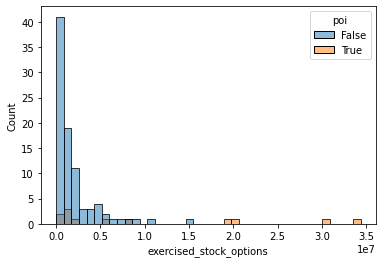

In [34]:
sns.histplot(data = df[df["exercised_stock_options"]<=0.5*1e8], x = "exercised_stock_options", hue = "poi")

Entre as despesas mais altas não há POI.

<AxesSubplot:xlabel='expenses', ylabel='Count'>

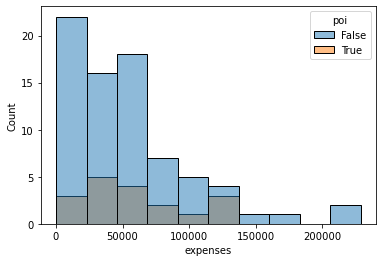

In [35]:
sns.histplot(data =df[df["expenses"]<=1*1e6], x = "expenses", hue = "poi")

Aparentemente não há correlação entre envio de mensagem e "POI"

<AxesSubplot:xlabel='from_messages', ylabel='Count'>

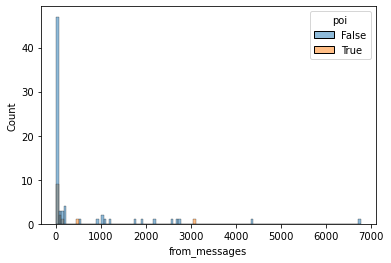

In [36]:
sns.histplot(data = df[df["from_messages"]<=8000], x = "from_messages", hue = "poi")

Aparentemente não há correlação entre receber mensagens de "POI" e ser um;

<AxesSubplot:xlabel='from_poi_to_this_person', ylabel='Count'>

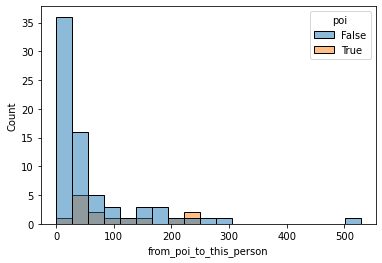

In [37]:
sns.histplot(data = df, x = "from_poi_to_this_person", hue = "poi")

Aparentemente não há correlação entre enviar mensagem a "POI" e ser um

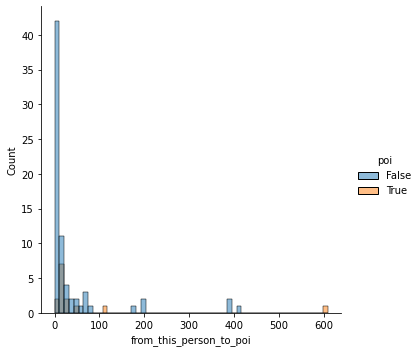

In [38]:
sns.displot(data = df, x = "from_this_person_to_poi", hue = "poi")

Aarentemente não há correlação entre incentivos de longo prazo e "POI"

<AxesSubplot:xlabel='long_term_incentive', ylabel='Count'>

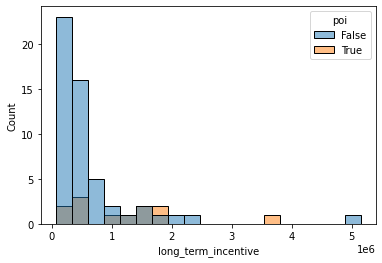

In [39]:
sns.histplot(data = df[df["long_term_incentive"]<1*1e7], x = "long_term_incentive", hue = "poi")

Aparentemente não há correlação entre ações restritas e "POI"

<AxesSubplot:xlabel='restricted_stock', ylabel='Count'>

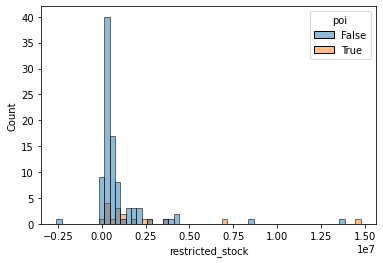

In [40]:
sns.histplot(data =df[df["restricted_stock"]<1.2*1e8], x = "restricted_stock", hue = "poi")

Nenhum funcionário com adiamento de ações restritas era "POI"

<AxesSubplot:xlabel='restricted_stock_deferred', ylabel='Count'>

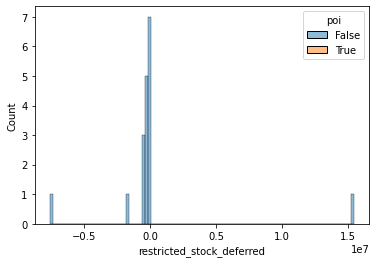

In [41]:
sns.histplot(data = df, x = "restricted_stock_deferred", hue = "poi")

Aparentemente, não há correlação entra salário e "POI"

<AxesSubplot:xlabel='salary', ylabel='Count'>

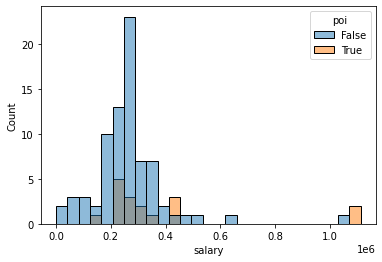

In [42]:
sns.histplot(data = df[df["salary"]<2.5*1e7], x = "salary", hue = "poi")

Aparentemente, não há correlação entra recibos dividos com "POI" e "POI"

<AxesSubplot:xlabel='shared_receipt_with_poi', ylabel='Count'>

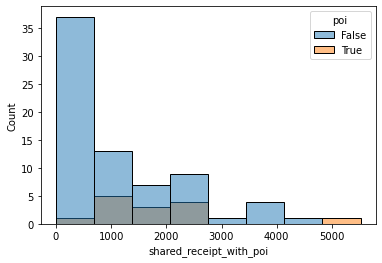

In [43]:
sns.histplot(data = df, x = "shared_receipt_with_poi", hue = "poi")

Os maiores pagamentos não são "POI"

<AxesSubplot:xlabel='total_payments', ylabel='Count'>

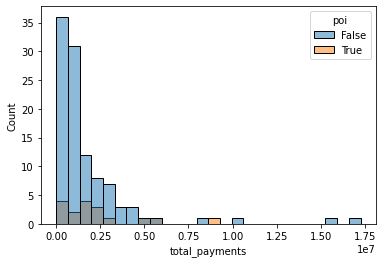

In [44]:
sns.histplot(data = df[df["total_payments"]< 0.5*1e8], x = "total_payments", hue = "poi")

## 5. Visualizações Efetivas 
Agora serão apresentadas 5 visualizações ja mostradas anteriormente. Serão melhorados alguns aspectos visuais para melhor compreensão.


<AxesSubplot:title={'center':'Deferred_Income e POI'}, xlabel='deferred_income', ylabel='Count'>

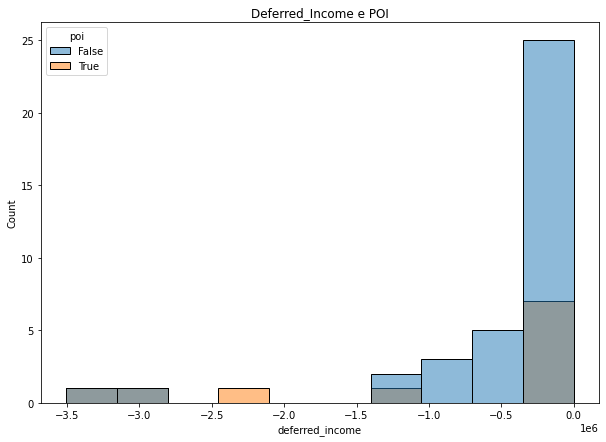

In [45]:
plt.figure(figsize=(10,7))
plt.title("Deferred_Income e ""POI""")
sns.histplot(data = df[df["deferred_income"]>=-0.5*1e7], x = "deferred_income", hue = "poi", bins = 10)

Text(0.5, 1.0, 'Director fees e POI')

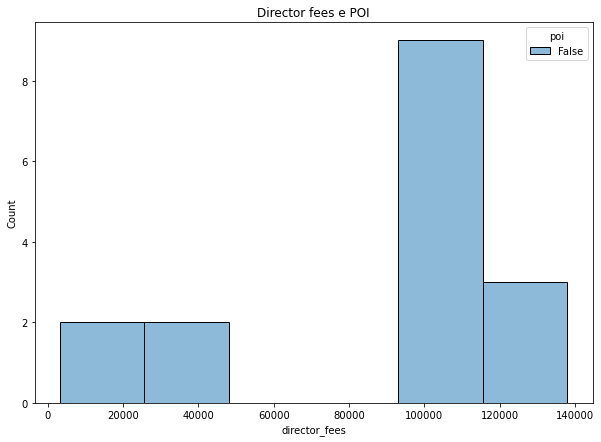

In [54]:
plt.figure(figsize=(10,7))
sns.histplot(data = df[df["director_fees"]<= 1.0*1e6], x = "director_fees", hue = "poi", bins = 6)
plt.title("Director fees e ""POI""")

Text(0.5, 1.0, 'Exercides stock options e POI')

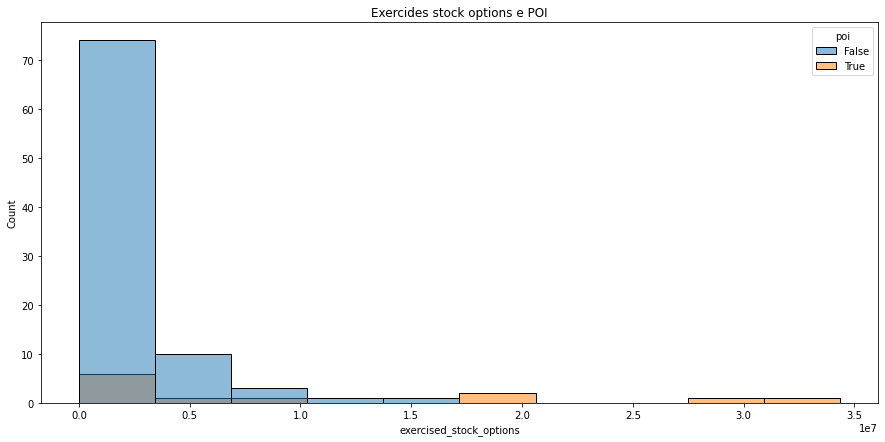

In [58]:
plt.figure(figsize=(15,7))
sns.histplot(data = df[df["exercised_stock_options"]<=0.5*1e8], x = "exercised_stock_options", hue = "poi", bins= 10)
plt.title("Exercised stock options e ""POI""")

Text(0.5, 1.0, 'restricted_stock_deferred e POI')

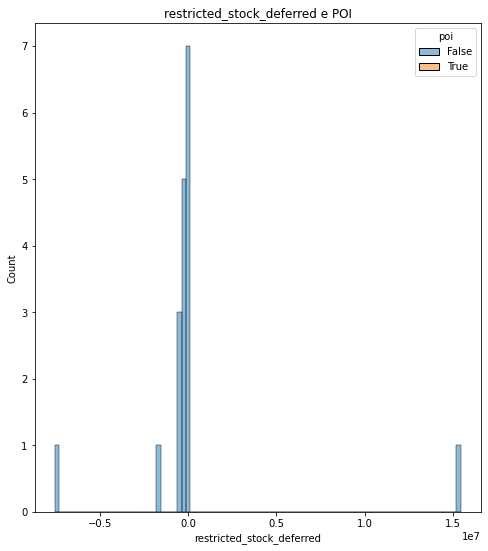

In [61]:
plt.figure(figsize=(8,9))
sns.histplot(data = df, x = "restricted_stock_deferred", hue = "poi")
plt.title("restricted_stock_deferred e ""POI""")

Text(0.5, 1.0, 'expenses e POI')

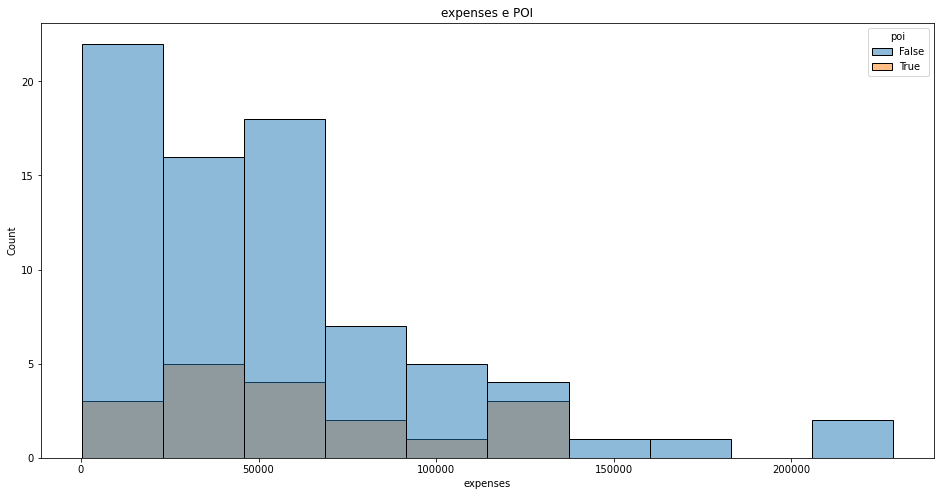

In [62]:
plt.figure(figsize=(16,8))
sns.histplot(data =df[df["expenses"]<=1*1e6], x = "expenses", hue = "poi")
plt.title("Expenses e ""POI""")

## 6. Conclusões

É complexo tirar soluções aprofundadas das analises até aqui feitas, precisariamos de modelos que ultrapassassem uma simples análise exploratória de dados e visualizações. Entretanto podemos ter alguns insights. 
1) Não há correlação entre os maiores salários e bonus e as participações na fraude, ao contrário do que poderia ser suposto. Existem "POI's" em todos os níveis saláriais e de bonus. 
2) Poucos diretores participam das fraudes. 
3) Há mais fraudadores entre aqueles que exercem opções de compra das ações.
4) Não há fraudadores entre aqueles que adiaram opções de compra de ações restritas.

A impressão que fica após essas análises é que funcionarários menos preocupados com o futuro da empresa, ou que a forma como rebeceriam dinheiro não dependesse do futuro da Enron seriam mais propensos a participar das fraudes.

## Reflexão
Foi possível desenvolver habilidades com ferramentas fundamentais na análise de dados, como Numpy e Pandas, além de outras bastante importantes na visualização de dados, como Matplotlib e Seaborn. O uso de uma base de dados real ajudou a ver na prática como as bibliotecas auxiliam a compreender um caso bastante complexo. 
Acredito que precisaria de mais tempo para aprender a utilizar melhor as ferramentas e fazer análises mais aprofundadas. 